# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [ ]:
nlp.vocab['cheese'].vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [ ]:
most_similar_w = nlp.vocab.vectors.most_similar((nlp.vocab["cheese"].vector).reshape(1,-1), n=10)
most_similar_w
# it return keys, best rows, scores

(array([[ 3410487188238951556,  1795962463927572069, 17479476687133065248,
         13555189390988822485, 15970645565272367518, 13404274123157729149,
         13526730482574066725, 15674428091679611195, 10271084669692215172,
          3951336375243613317]], dtype=uint64),
 array([[ 10509,  43122,   2012,  43466,  17992, 211092,  20547,  10093,
           3304,  21493]], dtype=int32),
 array([[1.    , 1.    , 1.    , 0.8229, 0.8229, 0.8229, 0.8163, 0.8163,
         0.8163, 0.7992]], dtype=float32))

In [ ]:
def most_similar(values,n):
 
  values = values.reshape(1,-1) # dimension is not suitable to feed in the most_similar function

  index = nlp.vocab.vectors.most_similar(values,n=n)
  similar_words =[]

  for i in index[0][0]:
   similar_words.append(nlp.vocab[i])  # append the realted words into a list by using nlp.vocab function

  return similar_words

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [ ]:
print(' '.join(w.text for w in most_similar(nlp.vocab['cheese'].vector,10)))

Cheese CHEESE cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses


You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [ ]:
print(' '.join(w.text for w in most_similar(nlp.vocab['great'].vector,10)))
print(' '.join(w.text for w in most_similar(nlp.vocab['car'].vector,10)))
print(' '.join(w.text for w in most_similar(nlp.vocab['fantasy'].vector,10)))

greAt GReat GREAT Great great GOOD good gOOD GOod Good
Car car CAR CARs cars Cars CARS vehicle VEHICLE Vehicle
FanTaSy Fantasy fantasy FANTASY FICTION fiction Fiction Fantasies FANTASIES fantasies


## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:

def plot_most_similar(input):
  similar_value = []
  similar_word  = []
  for i in input:
    similar_value.extend([w.vector for w  in most_similar((i.vector),10)])   # similar words in a vector form
    similar_word.extend([w.text for w  in most_similar((i.vector),10)])      # similar words in a text form
  
  X_embedded = TSNE(n_components=2).fit_transform(similar_value)   # minimize the high dimension to two dimensional vector
  plt.figure(figsize=(10,10))
  plt.scatter(X_embedded[:,0],X_embedded[:,1])    # scatter plot of the values

  for i, txt in enumerate(similar_word):
    plt.annotate(txt, (X_embedded[i][0], X_embedded[i][1]))  #annotate the scatter plot with words


Test your code by running the following cell:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


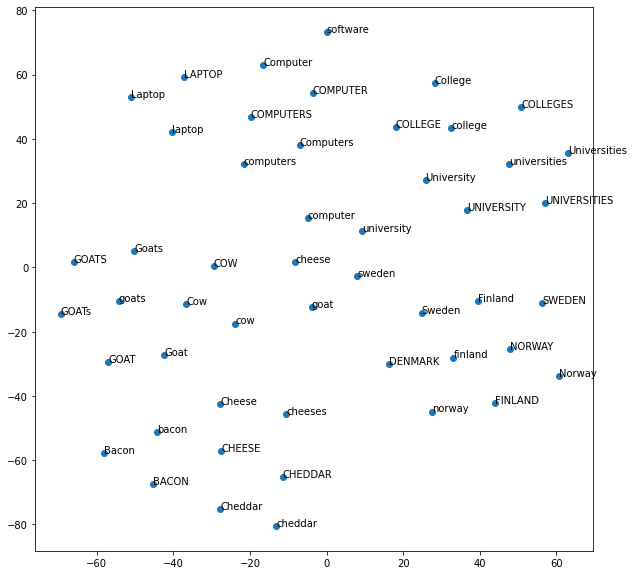

In [ ]:
list_words = []
for w in ['cheese', 'goat', 'sweden', 'university', 'computer']:
  list_words.append(nlp.vocab[w])
plot_most_similar(list_words)

Take a few minutes to look at your plot. What does it tell you? What does it *not* tell you?

By observing the plot ,words are clustered properly according to similar meaning. Where the words are arrange in the way those are having the closer values.So most similar function of the spacy is to find the similar synonyms for the particular words.

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that some types of word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [ ]:
def fourth(w1,w2,w3):
  w = w1.vector - w2.vector + w3.vector
  relating_word = most_similar(w,1)
  return(relating_word[0])

Test your code by running the following code. You should get *sister*.

In [ ]:
fourth(nlp.vocab['Brother'], nlp.vocab['Man'], nlp.vocab['Women']).text

'WOmen'

In [ ]:
print(fourth(nlp.vocab['Brother'], nlp.vocab['Man'], nlp.vocab['Woman']).text)
print(fourth(nlp.vocab['Boy'], nlp.vocab['Prince'], nlp.vocab['Princess']).text)
print(fourth(nlp.vocab["Girl"],nlp.vocab["Beautiful"],nlp.vocab["Handsome"]).text)
print(fourth(nlp.vocab["ran"],nlp.vocab["run"],nlp.vocab["walk"]).text)

SISTER
GIRL
BoY
WALKED


In [ ]:
print(fourth(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text)
print(fourth(nlp.vocab['Swedish'], nlp.vocab['Sweden'], nlp.vocab['France']).text)
print(fourth(nlp.vocab['better'], nlp.vocab['good'], nlp.vocab['bad']).text)
print(fourth(nlp.vocab['walked'], nlp.vocab['walk'], nlp.vocab['take']).text)

BERLIN
FRENCH
WORSE
TOOK


You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

In [ ]:
print(fourth(nlp.vocab['king'], nlp.vocab['man'], nlp.vocab['women']).text)
print(fourth(nlp.vocab['semicircle'], nlp.vocab['circle'], nlp.vocab['triangle']).text)

KIng
SEMICIRCLE


From the above analogies function, we came to know how one word is related to another word based on the distributional function.Model is failed to predict some words, it is due to the dataset is not large enough and also connecting the relation for the semicircle to the circle with a traingle is difficult.

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [ ]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('/content/sample_data/train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('/content/sample_data/dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [ ]:
df_train.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,A person is training his horse for a competiti...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is at a diner , ordering an omelette .",DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is outdoors , on a horse .",DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,They are smiling at their parents,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,There are children present,PRON AUX NOUN ADJ


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

Implement the standard random baseline that generates prediction by sampling from the empirical distribution of the classes in the training data. Write code to evaluate the performance of this classifier on the development data.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# training data
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

In [ ]:
# Dummy classifier model
clf = DummyClassifier(strategy='stratified')
clf.fit(X_train, y_train)

# test data
X_test = df_dev.iloc[:,1:]
y_test = df_dev.iloc[:,0]

# Predict the test by using dummmy classifier
dummy_test_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, dummy_test_pred))

               precision    recall  f1-score   support

contradiction       0.34      0.34      0.34      3278
   entailment       0.33      0.33      0.33      3329
      neutral       0.33      0.32      0.32      3235

     accuracy                           0.33      9842
    macro avg       0.33      0.33      0.33      9842
 weighted avg       0.33      0.33      0.33      9842



### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2? Why should one sentence be more useful than the other?

In [ ]:
df_train["sentence1"]

0        A person on a horse jumps over a broken down a...
1        A person on a horse jumps over a broken down a...
2        A person on a horse jumps over a broken down a...
3                    Children smiling and waving at camera
4                    Children smiling and waving at camera
                               ...                        
24995       A Food Service Worker sitting on the Counter .
24996       A Food Service Worker sitting on the Counter .
24997    A man sitting on a chair with his legs crossed...
24998    A man sitting on a chair with his legs crossed...
24999    A man sitting on a chair with his legs crossed...
Name: sentence1, Length: 25000, dtype: object

In [ ]:
x1 = df_train["sentence1"]
x2 = df_train["sentence2"]

tx1 = df_dev["sentence1"]
tx2 = df_dev["sentence2"]

y = df_train["gold_label"]
ty = df_dev["gold_label"]

print(x1.shape)
print(y.shape)

(25000,)
(25000,)


In [ ]:
logistic = linear_model.LogisticRegression(max_iter = 600)

pipe = Pipeline([("count_vectorizer",CountVectorizer()),
                 ("logistic",logistic)])

# fit the model to train data of sentence1
pipe.fit(x1, y)
test_p1 = pipe.predict(tx1)
print(classification_report(ty, test_p1))

               precision    recall  f1-score   support

contradiction       0.33      0.25      0.28      3278
   entailment       0.33      0.34      0.34      3329
      neutral       0.33      0.40      0.36      3235

     accuracy                           0.33      9842
    macro avg       0.33      0.33      0.33      9842
 weighted avg       0.33      0.33      0.33      9842



In [ ]:
# fit the model to train data of sentence1
pipe.fit(x2, y)
test_p2 = pipe.predict(tx2)
print(classification_report(ty, test_p2))

               precision    recall  f1-score   support

contradiction       0.60      0.60      0.60      3278
   entailment       0.59      0.65      0.62      3329
      neutral       0.62      0.56      0.59      3235

     accuracy                           0.60      9842
    macro avg       0.60      0.60      0.60      9842
 weighted avg       0.60      0.60      0.60      9842



From the two base line methods,pipeline method works better compare with the dummy classifier. In the pipe line method, as metioned from the question we gave sentences separately to the model.In the data model performs better on sentence 2 than sentence 1.One of the reasons could be that since the second sentence determines the weather the particular data point is neurtal or contradiction or an entailment. Hence the model naturally performs better with sentence 2 than sentence 1.

## Problem 5: A classifier based on manually engineered features

[Bowman et al., 2015](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – choose whichever performed better in Problem&nbsp;4)
* the cross-unigrams, as described above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [ ]:
import numpy as np
from itertools import product

def transform(row):
      s1 = np.array(row["sentence1"].split(" "))
      s2 = np.array(row["sentence2"].split(" "))
      t1 = np.array(row["tags1"].split(' '))
      t2 = np.array(row["tags2"].split(' '))
      unique_docs = []
      for tags in np.unique(t1):
        s12 = s1[np.where(np.array(t1) == tags)]
        s21 = s2[np.where(np.array(t2) == tags)]
        for cu in list(product(s12, s21)):
          unique_docs.append(f"{cu[0]}_{cu[1]}")
      return row.sentence2 + ' ' + ' '.join(unique_docs)

In [ ]:
transform(df_train.iloc[0,1:])
#x_train = df_train.drop(["gold_label"],axis=1)
#for i,j in x_train.iterrows():
  #poc = transform(j)

'A person is training his horse for a competition . on_for over_for down_for A_A A_a a_A a_a a_A a_a person_person person_horse person_competition horse_person horse_horse horse_competition airplane_person airplane_horse airplane_competition ._. jumps_training'

In [ ]:
 from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Transform a single row of the dataframe.
    def _transform(self,row):
      # split the dataframe into a array elements
      s1 = np.array(row.sentence1.split(" "))
      s2 = np.array(row.sentence2.split(" "))
      t1 = np.array(row.tags1.split(' '))
      t2 = np.array(row.tags2.split(' '))
      # open a list to save a words having same tags
      unique_docs = []
      for tags in np.unique(t1):
        s12 = s1[np.where(np.array(t1) == tags)]
        s21 = s2[np.where(np.array(t2) == tags)]
        # append all unigrams in a list
        for cu in list(product(s12, s21)):
          unique_docs.append(f"{cu[0]}_{cu[1]}") 
          # join with sentence 2
      return row.sentence2 + ' ' + ' '.join(unique_docs)
      

    def transform(self, X):
        return [self._transform(row) for row in X.itertuples()]

In [ ]:
x_train = df_train.drop(["gold_label"],axis=1)
x_test  = df_dev.drop(["gold_label"],axis =1)

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [ ]:
transformer = CrossUnigramsTransformer()
transformed_train = transformer.transform(x_train)
transformed_dev = transformer.transform(x_test)

# fit the pipe to the transformed data
pipe.fit(transformed_train,y)

# test the model by using test data
tdev = pipe.predict(transformed_dev)

In [ ]:
print(classification_report(tdev,ty))

               precision    recall  f1-score   support

contradiction       0.67      0.69      0.68      3150
   entailment       0.72      0.65      0.68      3700
      neutral       0.59      0.64      0.61      2992

     accuracy                           0.66      9842
    macro avg       0.66      0.66      0.66      9842
 weighted avg       0.66      0.66      0.66      9842



## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [ ]:
from functools import reduce
def tn(sentence):
  return reduce(lambda x,y: x+y, [nlp.vocab[w].vector for w in sentence.split()])


In [ ]:
#s1 = tn(df_train["sentence1"][0])
#s2 = tt(df_train["sentence2"][0])

In [ ]:
#ls =np.concatenate([s1,s2])
#len(ls)

In [ ]:
#len(s2)
df_train.sentence1[0]

'A person on a horse jumps over a broken down airplane .'

In [ ]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
      t = reduce(lambda x,y: x+y, [nlp.vocab[w].vector for w in sentence.split()])
      return t

    # Vectorize a single row of the dataframe.
    def _transform2(self, row):
        s1 = self._transform1(row.sentence1)
        s2 = self._transform1(row.sentence2)
        return np.stack([s1,s2])

    def transform(self, X):
        return np.concatenate(
            [self._transform2(row).reshape(1, -1) for row in X.itertuples()]
        )

In [ ]:
dt_train = df_train.drop(["tags1","tags2","gold_label"],axis =1)
dt_dev = df_dev.drop(["tags1","tags2","gold_label"],axis = 1)

In [ ]:
processor = PairedSentenceVectorizer()

# transform the trainng and development data
processed_train = processor.transform(dt_train)
processed_dev = processor.transform(dt_dev)

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [ ]:
# multilayer perceptron clssifier 
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( max_iter=8,hidden_layer_sizes=(300,300,300)).fit(processed_train, y) # y - gold_label of df_train

test_pred_processed = clf.predict(processed_dev)
print(classification_report(test_pred_processed,ty))   # ty - gold_label of df_dev

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


               precision    recall  f1-score   support

contradiction       0.63      0.64      0.64      3207
   entailment       0.63      0.67      0.65      3113
      neutral       0.64      0.59      0.62      3522

     accuracy                           0.63      9842
    macro avg       0.63      0.64      0.63      9842
 weighted avg       0.63      0.63      0.63      9842



## Problem 7: Final evaluation

Once you have working code for all problems, re-run Problems&nbsp;4–6 with the full training data. This will take quite a while (expect approximately 1&;nbsp;hour on Colab). **Make sure to not overwrite your previous results.** What are your results on the full data? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [ ]:
with bz2.open('/content/sample_data/train.jsonl.bz2', 'rt') as source:
    train = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the training data:', len(train))

with bz2.open('/content/sample_data/dev.jsonl.bz2', 'rt') as source:
    dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(dev))

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


In [ ]:
# full training data
fX_train = train.iloc[:,1:]
fy_train = train.iloc[:,0]

# test data
fX_test = dev.iloc[:,1:]
fy_test = dev.iloc[:,0]

# Dummy classifier model
clf = DummyClassifier(strategy='stratified')
clf.fit(fX_train, fy_train)

# Predict the test by using dummmy classifier
dummy_ftest_pred = clf.predict(fX_test)

print(classification_report(fy_test, dummy_ftest_pred))

               precision    recall  f1-score   support

contradiction       0.35      0.35      0.35      3278
   entailment       0.34      0.33      0.33      3329
      neutral       0.33      0.34      0.33      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



In [ ]:
fx1 = train["sentence1"]
fx2 = train["sentence2"]

ftx1 = dev["sentence1"]
ftx2 = dev["sentence2"]

fy = train["gold_label"]
fty = dev["gold_label"]

print(fx1.shape,fx2.shape)
print(ftx1.shape,ftx2.shape)
print(fy.shape,fty.shape)

## Baseline Model
logistic = linear_model.LogisticRegression(max_iter = 600)

pipe = Pipeline([("count_vectorizer",CountVectorizer()),
                 ("logistic",logistic)])

# fit the model to train data of sentence1
pipe.fit(fx1, fy)
test_ftx1 = pipe.predict(ftx1)
print(classification_report(fty, test_ftx1))

# fit the model to train data of sentence1
pipe.fit(fx2, fy)
test_ftx2 = pipe.predict(ftx2)
print(classification_report(fty, test_ftx2))

(549367,) (549367,)
(9842,) (9842,)
(549367,) (9842,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


               precision    recall  f1-score   support

contradiction       0.34      0.25      0.29      3278
   entailment       0.34      0.39      0.36      3329
      neutral       0.33      0.36      0.35      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.33      9842
 weighted avg       0.34      0.34      0.33      9842



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


               precision    recall  f1-score   support

contradiction       0.65      0.63      0.64      3278
   entailment       0.64      0.72      0.68      3329
      neutral       0.67      0.60      0.63      3235

     accuracy                           0.65      9842
    macro avg       0.65      0.65      0.65      9842
 weighted avg       0.65      0.65      0.65      9842



In [ ]:
## Problem 5
fx_train = train.drop(["gold_label"],axis=1)
x_test  = df_dev.drop(["gold_label"],axis =1)

transformed_ftrain = transformer.transform(fx_train)
transformed_fdev = transformer.transform(x_test)

# fit the pipe to the transformed data
pipe.fit(transformed_ftrain,fy)

# test the model by using test data
ftdev = pipe.predict(transformed_fdev)

print(classification_report(ftdev,fty))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


               precision    recall  f1-score   support

contradiction       0.77      0.78      0.78      3242
   entailment       0.81      0.76      0.78      3522
      neutral       0.69      0.73      0.71      3078

     accuracy                           0.76      9842
    macro avg       0.76      0.76      0.76      9842
 weighted avg       0.76      0.76      0.76      9842



In [ ]:
## problem 6
fdt_train = train.drop(["tags1","tags2","gold_label"],axis =1)
fdt_dev = dev.drop(["tags1","tags2","gold_label"],axis = 1)

processor = PairedSentenceVectorizer()

# transform the trainng and development data
processed_ftrain = processor.transform(fdt_train)
processed_fdev = processor.transform(fdt_dev)

# multilayer perceptron clssifier 
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( max_iter=8,hidden_layer_sizes=(300,300,300)).fit(processed_ftrain, fy) # fy - gold_label of train

ftest_pred_processed = clf.predict(processed_fdev)
print(classification_report(ftest_pred_processed,fty))   # fty - gold_label of dev

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


               precision    recall  f1-score   support

contradiction       0.69      0.84      0.76      2658
   entailment       0.81      0.77      0.79      3477
      neutral       0.77      0.68      0.72      3707

     accuracy                           0.76      9842
    macro avg       0.76      0.76      0.76      9842
 weighted avg       0.76      0.76      0.76      9842



When using the full dataset, it seeems model perform better than the problem 5 and 6.There is a tradeoff though as we see large training time increases for a very slight increase in performance which might not always be worth it

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>

Reflection questions
The following reflection questions are questions that you could be asked in the oral exam. Try to answer each of them in the form of a short text and enter it in the cell below. You will get feedback on your answers from your lab assistant.



RQ 4.1: In Problem 3, you manipulated word vectors using addition and subtraction, getting intermediate vectors which are still valid embeddings. Consider the difference vector Stockholm $-$ Sweden. What does that vector intuitively represent? What words do you think it should be most similar to?



The Vector respresents the relationhip between the two words. It should be more similar to countries and capitals of the countries. The vector simply means the difference of distances between the two words namely Sweden and Stockholm , and this difference could be interpreted as the distance between the words itself and since the difference is added to Germany it returns its corresponding capital Berlin.




RQ 4.2: Manually engineering features is a fairly time-consuming task, but as shown in Problem 5, can result in systems which are on par with embedding-based systems. Conversely, embedding-based systems avoid manual feature engineering, but often require significantly more computational resources. Looking at your results from Problem 7, are embedding-based systems worth the extra resources in the context of this task?




Yes, It is worth the extra investment in computation. This is simply due to the following reasons , one being the increase in perfromence itself and it seems to have a balance in modelling both sentences equally.





RQ 4.3: Throughout the lab, you have been using pre-trained word vectors from spaCy. In Problem 7, you used them to compute the input to a neural network. Another common pattern is to use them to initialize an embedding layer in a neural network. (Have a look at this article if you are unfamiliar with that pattern.) Explain the difference between the two usage patterns. What advantages/disadvantages do they have?


By using the pretrained embedding layer will perform better in some cases. But it is not working for all the domain specific cases and diiferent language data.since we are using spacy it performs good in our case.

* Pretrained word embeddings capture the semantic and syntactic meaning of a word as they are trained on large datasets. They are capable of boosting the performance of a Natural Language Processing (NLP) model.

The challenging problem while using our own embedding techinque is :
* sparsity of training data
* large number of trainable parameters

So the deep learning and transfer learning are the techniques used for word embedding.

Transfer learning focus on knowledge that gained from the previous task,that used in upcoming new tasks.